In [1]:
import tensorflow as tf
msg = tf.constant('Hello, TensorFlow!')
tf.print(msg)

Hello, TensorFlow!


In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split        

In [3]:
import random
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageEnhance
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

print("GPU is","avaliable" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is avaliable


In [4]:
import tensorflow as tf
print("tensorflow version:",tf.__version__)
print("GPU is","avaliable" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

tensorflow version: 2.5.0
GPU is avaliable


In [5]:
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
# Runs the op.
tf.print(c)

[[22 28]
 [49 64]]


In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split        
import time
import random
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageEnhance
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from numpy.core.numeric import False_ 

# os.chdir('/kaggle/input/testing')
print("GPU is","avaliable" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

GPU is avaliable


In [8]:
# %% [markdown]
# # Data pre-processing
#parameter about input feature
item = ["HR", "O2Sat", "Temp", "SBP", "MAP", "Resp"] 
bound = [[30, 200], 
         [80, 100], 
         [35, 39], 
         [60, 180], 
         [60, 130], 
         [10, 35] 
        ] 
lower_bound=0 
upper_bound=1

#parameter about how many window we want to cut in one person data
random_times=10

#neural network set
tmpData = [] 
tmpLabel = []


In [9]:
# %% [code] {"jupyter":{"outputs_hidden":false},"execution":{"iopub.status.busy":"2021-06-27T14:51:17.106599Z","iopub.execute_input":"2021-06-27T14:51:17.107155Z","iopub.status.idle":"2021-06-27T14:51:17.113786Z","shell.execute_reply.started":"2021-06-27T14:51:17.107087Z","shell.execute_reply":"2021-06-27T14:51:17.113087Z"}}
def rule(_label,check_begin,check_end,_window_size,_check_size):
    spesis=np.nanmean(_label)
    a=0
    if _label[0:_window_size-1].all()==0:
        check=dataframe["SepsisLabel"].iloc[check_begin:check_end].to_numpy()
        if np.nanmean(check)==0:
            # no sepsis : No sepsis across (window_size) hours period and next (check_size) hour
            outlabel= 0
        else:
            # pre-sepsis 1 : No sepsis across (window_size) hours period & sepsis in (window_size+1)~(window_size+check_size) hour
            outlabel=1
    elif np.nanmean(_label[0:5])==0 and _label[_window_size-1]==1:
#         pre-sepsis 2 : No sepsis across (window_size/2) hours period & sepsis in number (window_size) hour
        outlabel = 1
    if spesis>=(1/_window_size):
        # spesis : first hour and last hour are both spesis & total spesis time > 5
        outlabel = 2
    return outlabel

# %% [code] {"jupyter":{"outputs_hidden":false},"execution":{"iopub.status.busy":"2021-06-27T14:51:17.118410Z","iopub.execute_input":"2021-06-27T14:51:17.118887Z","iopub.status.idle":"2021-06-27T14:51:17.132342Z","shell.execute_reply.started":"2021-06-27T14:51:17.118836Z","shell.execute_reply":"2021-06-27T14:51:17.131514Z"}}
#  window               #check      #label
# [0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0] 0
# [0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0] 0
# [0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0] 0
# [0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0] 0
# [0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0] 0
# [0 0 0 0 0 0 0 0 0 0] [0 0 0 0 0] 0
# [0 0 0 0 0 0 0 0 0 0] [0 0 0 0 1] 1
# [0 0 0 0 0 0 0 0 0 0] [0 0 0 1 1] 1
# [0 0 0 0 0 0 0 0 0 0] [0 0 1 1 1] 1
# [0 0 0 0 0 0 0 0 0 0] [0 1 1 1 1] 1
# [0 0 0 0 0 0 0 0 0 0] [1 1 1 1 1] 1
# [0 0 0 0 0 0 0 0 0  
# [0 0 0 0 0 1 1 1 1 1] [1 1 1 1 1] 2
# [0 0 0 0 1 1 1 1 1 1] [1 1 1 1] 2
# [0 0 0 1 1 1 1 1 1 1] [1 1 1] 2
# [0 0 1 1 1 1 1 1 1 1] [1 1] 2
# [0 1 1 1 1 1 1 1 1 1] [1] 2

In [10]:
# %% [code] {"jupyter":{"outputs_hidden":false},"execution":{"iopub.status.busy":"2021-06-27T14:51:17.189751Z","iopub.execute_input":"2021-06-27T14:51:17.190388Z","iopub.status.idle":"2021-06-27T14:53:59.332797Z","shell.execute_reply.started":"2021-06-27T14:51:17.190334Z","shell.execute_reply":"2021-06-27T14:53:59.332019Z"}}
tStart = time.time()
for file in range(1, 10000):
    #Read data
    #training_set data filename
    num = "%06d" % file
    filename = "p"+num
    ##training_setB data filename
    #num=100000+i
    #filename = "p"+str(num)
    try:
        dataframe = pd.read_csv("./training/"+filename+".psv", skiprows=0, sep='|') 
        window_size=10
        check_size=5
        #Random cut method
        index=0
        for sample_time in range(random_times):
            leng = len(dataframe)-window_size
            up = random.randint(1, leng)
            
            #setup label 
            label = dataframe["SepsisLabel"].iloc[up:up+window_size].to_numpy()   
            a=rule(label,up+window_size,up+window_size+check_size,window_size,check_size)
            if random.randint(0,20)<=10:
                continue
            classify=rule(label,sample_time+window_size,sample_time+window_size+check_size,window_size,check_size)
            tmpLabel.append(classify)
                    
            #fill nan value and make dataframe(actually is numpy array)
            data= np.empty((window_size))
            for items in range(len(item)):
                dataFromDF = dataframe[item[items]].drop(index=0).fillna(method='ffill').fillna(method='bfill')
                dataFromDF = dataFromDF.iloc[up-1:up+window_size-1] #??????
                dataFromDF = np.array((dataFromDF - bound[items][lower_bound])/(bound[items][upper_bound] - bound[items][lower_bound]))
                if items==0:
                    data=dataFromDF
                else:
                    data=np.vstack([data,dataFromDF])
            
            #Change to graph and enhance it, than save feature graph to training set
            data *= 255  # 变换为0-255的灰度值
            im = Image.fromarray(data.T).convert('L') # 这样才能转为灰度图，如果是彩色图则改L为‘RGB’
            im = ImageEnhance.Contrast(im).enhance(5.5).resize((128,128))#ImageEnhance.Contrast(im).enhance(0)
            savepath="./out/"+str(classify)+"/"+filename+str(index)+".jpg"
            index+=1
            im.save(savepath)
#             print(savepath)
            tmpData.append(np.array(im))
            
        # from buttom to half data len 
        # because number of label 0 is about 90% of all data when random cut method  
#         print(int(len(dataframe)/2),len(dataframe))
        begin=int(len(dataframe)/2)
        end=len(dataframe)
        for sample_time in range(int(len(dataframe)/2)-window_size,len(dataframe)-window_size):
            if sample_time>0:
                #setup label (1,2)
                label = dataframe["SepsisLabel"].iloc[sample_time:sample_time+window_size].to_numpy()   
                if np.nanmean(label)>0 :
                    classify=rule(label,sample_time+window_size,sample_time+window_size+check_size,window_size,check_size)
                    tmpLabel.append(classify)
                    #fill nan value and make dataframe(actually is numpy array)
                    data= np.empty((window_size))
                    for items in range(len(item)):
                        dataFromDF = dataframe[item[items]].drop(index=0).fillna(method='ffill').fillna(method='bfill')
                        dataFromDF = dataFromDF.iloc[sample_time:sample_time+window_size]
                        dataFromDF = np.array((dataFromDF - bound[items][lower_bound])/(bound[items][upper_bound] - bound[items][lower_bound]))
                        if items==0:
                            data=dataFromDF
                        else:
                            data=np.vstack([data,dataFromDF])
            
                    #Change to graph and enhance it, than save feature graph to training set
                    data *= 255  # 变换为0-255的灰度值
                    im = Image.fromarray(data.T).convert('L') # 这样才能转为灰度图，如果是彩色图则改L为‘RGB’
                    im = ImageEnhance.Contrast(im).enhance(5.5).resize((128,128))#ImageEnhance.Contrast(im).enhance(0)
                    savepath="./out/"+str(classify)+"/"+filename+str(index)+".jpg"
                    index+=1
#                     print(savepath)
                    im.save(savepath)
                    tmpData.append(np.array(im))
    except:
        continue
tEnd = time.time()

print(f"\nData processing complete in {tEnd - tStart} seconds.\n")

C:\Users\andy1\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\andy1\anaconda3\envs\tensorflow-gpu\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



Data processing complete in 347.25672793388367 seconds.



0


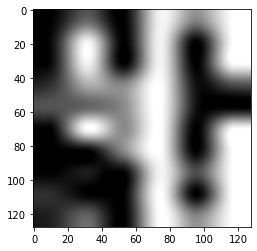

In [11]:
for num in range(len(tmpLabel)):
    if tmpLabel[num]==0:
        plt.imshow(tmpData[num], cmap='gray')
        print(tmpLabel[num])
        break

1


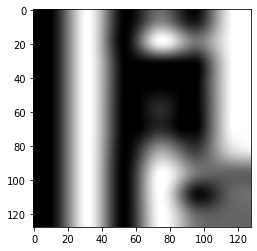

In [12]:
# how feature graph look like
for num in range(len(tmpLabel)):
    if tmpLabel[num]==1:
        plt.imshow(tmpData[num], cmap='gray')
        print(tmpLabel[num])
        break

2


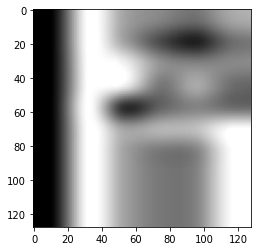

In [13]:
# how feature graph look like
for num in range(len(tmpLabel)):
    if tmpLabel[num]==2:
        plt.imshow(tmpData[num], cmap='gray')
        print(tmpLabel[num])
        break

In [14]:
#Number of each category
numofclass0=0
numofclass1=0
numofclass2=0
for num in range(len(tmpLabel)):
    if tmpLabel[num]==0:
        numofclass0+=1
    elif tmpLabel[num]==1:
        numofclass1+=1
    elif tmpLabel[num]==2:
        numofclass2+=1
print(numofclass0,"->",numofclass0/len(tmpLabel))
print(numofclass1,"->",numofclass1/len(tmpLabel))
print(numofclass2,"->",numofclass2/len(tmpLabel))

43056 -> 0.8257292445774121
1687 -> 0.03235333601825748
7400 -> 0.1419174194043304


In [15]:
tStart = time.time()

# shuffle, seed = 6
random.Random(6).shuffle(tmpData)
random.Random(6).shuffle(tmpLabel)

print("Shuffle complete.")

tmpData = np.array(tmpData)
tmpLabel = np.array(tmpLabel)

print("Transfer complete.")

trainingData, validData, trainingLabel, validLabel = train_test_split(tmpData, tmpLabel, test_size=0.125)

print("Split data complete.")
    
trainingData = trainingData.reshape(len(trainingData), 128,128, 1)
trainingLabel = trainingLabel.reshape(len(trainingLabel), 1)
# print(trainingData)
validData = validData.reshape(len(validData), 128,128, 1)
validLabel = validLabel.reshape(len(validLabel), 1)

print("Reshape data complete.")

trainingLabelOneHot = np_utils.to_categorical(trainingLabel) # One-Hot encoding label
validLabelOneHot = np_utils.to_categorical(validLabel)

tEnd = time.time()

print(f"\nPrepare training data complete in {tEnd - tStart} seconds.\n")

Shuffle complete.
Transfer complete.
Split data complete.
Reshape data complete.

Prepare training data complete in 0.8565618991851807 seconds.



In [16]:
from keras import backend as K
K.image_data_format() == "channels_first"

tStart = time.time()

model = Sequential()

model.add(Conv2D(filters=36, kernel_size=(9, 9), activation='relu', input_shape=(128,128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=36, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation = 'relu'))
model.add(Dense(units=3, activation = 'softmax')) # 3 labels

model.summary()

# sgd = Adam(lr=0.0005)

model.compile(loss = 'categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

tEnd = time.time()

print(f"\nBuild model complete in {tEnd - tStart} seconds.\n")



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 120, 120, 36)      2952      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 56, 56, 36)        32436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 36)        11700     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 36)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 36)        0

In [17]:
# %% [code] {"jupyter":{"outputs_hidden":false},"execution":{"iopub.status.busy":"2021-06-27T14:54:00.001214Z","iopub.execute_input":"2021-06-27T14:54:00.001530Z","iopub.status.idle":"2021-06-27T14:54:00.759721Z","shell.execute_reply.started":"2021-06-27T14:54:00.001500Z","shell.execute_reply":"2021-06-27T14:54:00.758520Z"}}
def validDataGenerator(data, label, batch_size):
    
    # 分批載入資料，每批數量為batch_size
    
    i = 0
    
    while (True):
        
        yield data[i*batch_size : (i+1)*batch_size], label[i*batch_size : (i+1)*batch_size]
        
        if(i < len(label)//batch_size):
            i += 1
        else:
            i = 0

trainingDataGenerator = ImageDataGenerator(
#                             rotation_range=15,
#                             height_shif t_range=0.1,
#                             width_shift_range=0.05,
#                             horizontal_flip=True,
#                             vertical_flip=True,
#                             zoom_range=0.1,
                            data_format='channels_last'
)

trainingDataGenerator.fit(trainingData)

# %% [code] {"jupyter":{"outputs_hidden":false},"execution":{"iopub.status.busy":"2021-06-27T14:54:00.762312Z","iopub.execute_input":"2021-06-27T14:54:00.762631Z"}}
tStart = time.time()

batch_size = 128
epochs = 50

reduce_lr_from_loss = ReduceLROnPlateau(
#     factor = 0.95,
    factor = 0.7,
    monitor = 'val_loss',
    min_lr = 1e-6,
    patience = 4,
    verbose = 1,
)

reduce_lr_from_acc = ReduceLROnPlateau(
#     factor = 0.98,
    factor = 0.8,
    monitor = 'val_accuracy',
    min_lr = 1e-6,
    patience = 4,
    verbose = 1,
)

train_history = model.fit_generator(trainingDataGenerator.flow(trainingData, trainingLabelOneHot, batch_size),
    steps_per_epoch=len(trainingLabelOneHot)//batch_size,
    epochs=epochs,
    validation_data=validDataGenerator(validData, validLabelOneHot, batch_size),
    validation_steps=len(validLabelOneHot)//batch_size,
    verbose=1,
    callbacks=[reduce_lr_from_loss, reduce_lr_from_acc],
#     initial_epoch=75
)

tEnd = time.time()

print(f"\nTrain model complete in {tEnd - tStart} seconds.\n")



C:\Users\andy1\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
356/356 [==============================] - 60s 115ms/step - loss: 1.6445 - accuracy: 0.7934 - val_loss: 0.5476 - val_accuracy: 0.8156
Epoch 2/50
356/356 [==============================] - 39s 110ms/step - loss: 1.8891 - accuracy: 0.8215 - val_loss: 0.5550 - val_accuracy: 0.8153
Epoch 3/50
356/356 [==============================] - 39s 110ms/step - loss: 0.5704 - accuracy: 0.8266 - val_loss: 0.5470 - val_accuracy: 0.8153
Epoch 4/50
356/356 [==============================] - 39s 110ms/step - loss: 0.5293 - accuracy: 0.8246 - val_loss: 0.5440 - val_accuracy: 0.8148
Epoch 5/50
356/356 [==============================] - 39s 111ms/step - loss: 0.5173 - accuracy: 0.8309 - val_loss: 0.5376 - val_accuracy: 0.8150

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.000800000037997961.
Epoch 6/50
356/356 [==============================] - 39s 111ms/step - loss: 0.5197 - accuracy: 0.8278 - val_loss: 0.5360 - val_accuracy: 0.8150
Epoch 7/50
356/356 [==============================

356/356 [==============================] - 40s 111ms/step - loss: 0.1782 - accuracy: 0.9332 - val_loss: 0.6923 - val_accuracy: 0.8311

Train model complete in 1997.2684025764465 seconds.



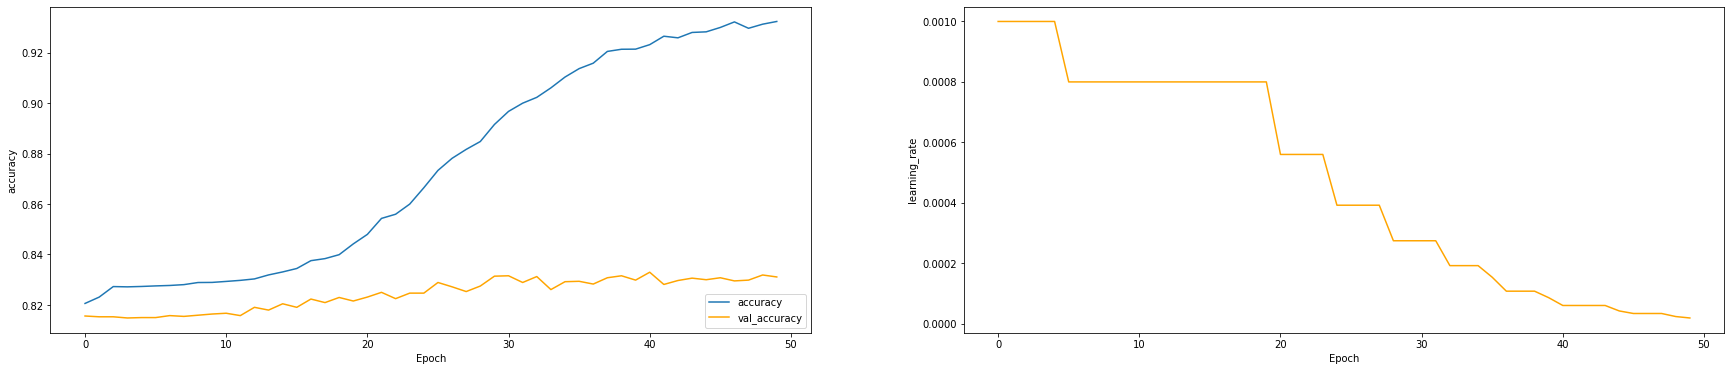

save done


C:\Users\andy1\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


predict,0,1,2
label,,,
0,4978,58,277
1,166,48,3
2,595,4,389


In [18]:
# %% [code] {"jupyter":{"outputs_hidden":false}}
plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
plt.plot(train_history.history['accuracy'], label="accuracy")
plt.plot(train_history.history['val_accuracy'], 'orange', label="val_accuracy")
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

# plt.subplot(1, 3, 2)
# plt.plot(train_history.history['loss'], label="loss")
# plt.plot( plt.xlabel('Epoch')
# plt.ylabel('loss')
# plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train_history.history['lr'], 'orange')
plt.xlabel('Epoch')
plt.ylabel('learning_rate')

# plt.savefig("DefectDetecting-2.png")
plt.show()

# %% [code] {"jupyter":{"outputs_hidden":false}}
model.save('/kaggle/working/spesis-class3-v1.h5')
print("save done")

# %% [code] {"jupyter":{"outputs_hidden":false}}
import pandas as pd

prediction = model.predict_classes(validData)

pd.crosstab(validLabel.reshape(len(validLabel)), prediction, rownames=['label'], colnames=['predict'])